In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
import os
import glob
import random

In [2]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Bidirectional,ConvLSTM2D,BatchNormalization,Conv3D
from keras import Input
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,SimpleRNN,GRU
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = np.load('/content/gdrive/MyDrive/DATN/Augument/WUW/Train_66_WuW_True_AIS_1s.npz')


In [5]:
data["y_train"].shape

(13545, 2)

In [6]:
data["x_train"].shape

(13545, 66, 39)

In [7]:
data["y_val"].shape

(3387, 2)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))


    return model

# Assuming input_shape is the shape of your 1-second audio data
input_shape = (data["x_train"].shape[1], data["x_train"].shape[2], 1)
model = create_cnn_model(input_shape)

In [9]:

model.compile( loss='binary_crossentropy', metrics=[ 'accuracy'],optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 37, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 18, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 16, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7680)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [10]:
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/DATN/Augument/WUW/H5/Train_66_WuW_True_AIS_1s.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
# checkpointer = ModelCheckpoint(filepath='saved_models/best_fcn.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)
# early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
# callbacks = [checkpointer,early_stopping]
callbacks = [checkpointer]
batch_size = 10
epochs = 50
# train the model using the training set and validating using validation set
history = model.fit(data["x_train"], data["y_train"], epochs=epochs, batch_size=batch_size, validation_data=(data["x_val"], data["y_val"]),
          callbacks=callbacks)




Epoch 1/50
1352/1355 [============================>.] - ETA: 0s - loss: 0.1702 - accuracy: 0.9620
Epoch 1: val_accuracy improved from -inf to 0.98908, saving model to /content/gdrive/MyDrive/DATN/Augument/WUW/H5/Train_66_WuW_True_AIS_1s.h5
1355/1355 [==============================] - 31s 22ms/step - loss: 0.1700 - accuracy: 0.9621 - val_loss: 0.0962 - val_accuracy: 0.9891
Epoch 2/50
   7/1355 [..............................] - ETA: 24s - loss: 0.1184 - accuracy: 0.9714

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1354/1355 [============================>.] - ETA: 0s - loss: 0.0677 - accuracy: 0.9925
Epoch 2: val_accuracy did not improve from 0.98908
1355/1355 [==============================] - 29s 22ms/step - loss: 0.0677 - accuracy: 0.9925 - val_loss: 0.0976 - val_accuracy: 0.9755
Epoch 3/50
1354/1355 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.9942
Epoch 3: val_accuracy improved from 0.98908 to 0.99498, saving model to /content/gdrive/MyDrive/DATN/Augument/WUW/H5/Train_66_WuW_True_AIS_1s.h5
1355/1355 [==============================] - 30s 22ms/step - loss: 0.0431 - accuracy: 0.9942 - val_loss: 0.0307 - val_accuracy: 0.9950
Epoch 4/50
1354/1355 [============================>.] - ETA: 0s - loss: 0.0265 - accuracy: 0.9962
Epoch 4: val_accuracy improved from 0.99498 to 0.99705, saving model to /content/gdrive/MyDrive/DATN/Augument/WUW/H5/Train_66_WuW_True_AIS_1s.h5
1355/1355 [==============================] - 34s 25ms/step - loss: 0.0265 - accuracy: 0.9962 - val_loss: 0

In [11]:
best_model = load_model('/content/gdrive/MyDrive/DATN/Augument/WUW/H5/Train_66_WuW_True_AIS_1s.h5')

In [12]:
print(f"Evaluating the model using {len(data['x_val'])} valid samples...")
loss, accuracy = best_model.evaluate(data["x_val"], data["y_val"], verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Evaluating the model using 3387 valid samples...
Loss: 0.0014
Accuracy: 99.97%


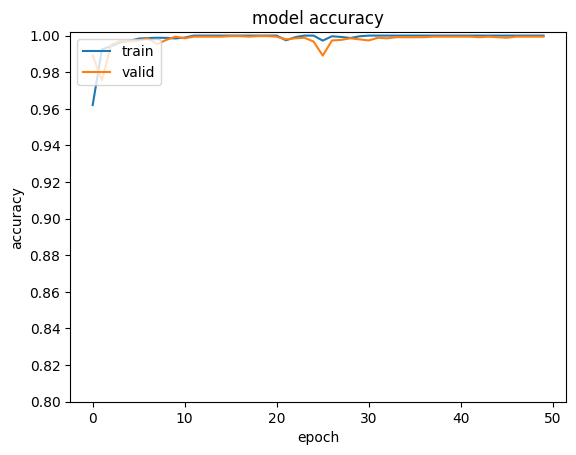

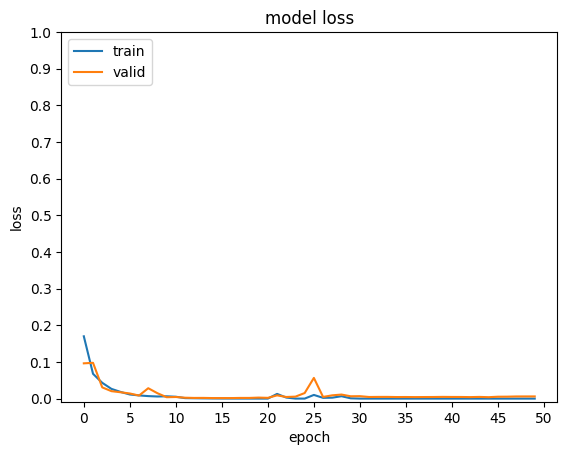

In [27]:
# Code vẽ biểu đồ độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

# Thiết lập trục tung từ 0.9 đến 1 với bước là 0.01
plt.yticks(np.arange(0.8, 1.01, 0.02))

plt.show()

# Code vẽ biểu đồ hàm mất mát
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

# Thiết lập trục tung từ 0 đến 0.2 với bước là 0.01
plt.yticks(np.arange(0, 1.1, 0.1))

# Thiết lập trục hoành từ 0 đến 100 với bước là 10
plt.xticks(np.arange(0, 51, 5))

plt.show()

In [14]:
feature_test_set = np.load('/content/gdrive/MyDrive/DATN/Augument/WUW/Test_66_WuW_True_AIS_1s.npz')
x_test = feature_test_set['x_test']
y_test = feature_test_set['y_test']

In [15]:
feature_test_set['x_test'].shape

(1876, 66, 39)

In [16]:
feature_test_set['y_test'].shape

(1876, 2)

In [17]:
print(f"Evaluating the model using {len(x_test)} samples...")
loss, accuracy = best_model.evaluate(x_test,y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Evaluating the model using 1876 samples...
Loss: 0.0257
Accuracy: 99.47%


In [18]:
#1_Wikioi','2_Batdieuhoa','3_Tatdieuhoa','4_Tang1do','5_Tang2do',
#'6_Tang3do','7_Giam1do','8_Giam2do','9_Giam3do','16_Bat26do','23_Batchedotudong','24_Batchedolammat','25_Batchedolamkho']
pre_y_test = []
pre_test = best_model.predict(x_test, verbose=0)
for i in range(0,y_test.shape[0]):
  s = np.argmax(pre_test[i])
  match s:
    case 0:
      pre_y_test.append(["Wikioi",y_test[i]])
    case 1:
      pre_y_test.append(["NoDetect",y_test[i]])
value_test=pd.DataFrame(pre_y_test,columns=['predict_label','reference_label'])
value_test

,predict_label,reference_label
0,Wikioi,"[1.0, 0.0]"
1,Wikioi,"[1.0, 0.0]"
2,Wikioi,"[1.0, 0.0]"
3,Wikioi,"[1.0, 0.0]"
4,Wikioi,"[1.0, 0.0]"
...,...,...
1871,NoDetect,"[0.0, 1.0]"
1872,NoDetect,"[0.0, 1.0]"
1873,NoDetect,"[0.0, 1.0]"
1874,NoDetect,"[0.0, 1.0]"


In [19]:
# testy = value_test['reference_label'].tolist()
ypredict = value_test['predict_label'].tolist()

In [20]:
# # Các tên nhãn
# label_names = ['Batdieuhoa','Tatdieuhoa','Tang1do','Tang2do','Tang3do','Giam1do','Giam2do','Giam3do','Bat26do','Noise']
label_names = ['Wikioi',"NoDetect"]

# Tạo từ điển ánh xạ giữa index và tên nhãn
index_to_label = {i: label for i, label in enumerate(label_names)}

# Chuyển về dạng nhãn tương ứng
original_labels = [index_to_label[np.argmax(one_hot_array)] for one_hot_array in value_test['reference_label'].tolist()]

In [21]:
value_test['predict_label']

0         Wikioi
1         Wikioi
2         Wikioi
3         Wikioi
4         Wikioi
          ...   
1871    NoDetect
1872    NoDetect
1873    NoDetect
1874    NoDetect
1875    NoDetect
Name: predict_label, Length: 1876, dtype: object

In [22]:
testy = original_labels

In [23]:
testy = original_labels
ypredict = value_test['predict_label'].tolist()

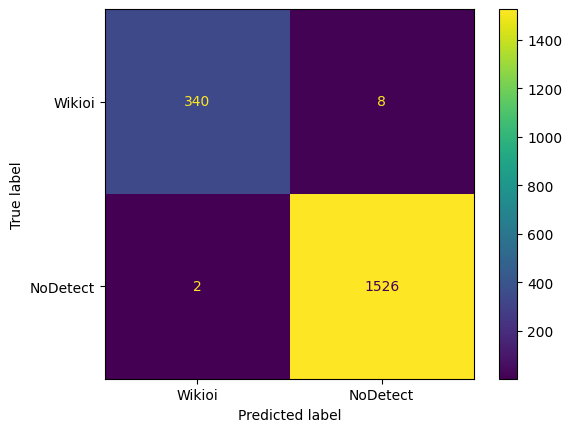

In [24]:
# 'Wikioi','Batdieuhoa','Tatdieuhoa','Tang1do','Tang2do','Tang3do','Giam1do','Giam2do','Giam3do','Bat26do','Batchedotudong','Batchedolammat','Batchedolamkho'
conf_matrix = confusion_matrix(testy, ypredict, labels = ['Wikioi',"NoDetect"])
disp = ConfusionMatrixDisplay( confusion_matrix=conf_matrix, display_labels= ['Wikioi',"NoDetect"])
disp.plot()
plt.show()